<a href="https://colab.research.google.com/github/vinkharisma/PCVK_Genap_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM FILTER

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [2]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

Konvolusi tanpa library

Membuat fungsi konvolusi

Fungsi konvolusi yang dibuat memiliki parameter berupa : 
1. Citra masukkan
2. Kernel berupa matriks untuk memfilter citra
3. Nilai stride / besarnya pergeseran untuk setiap kovolusi
4. Nilai pada yang akan ditambahkan pada citra

In [16]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
      
  return new_image  

d. Load citra yang akan diproses dan ubah menjadi citra keabuan

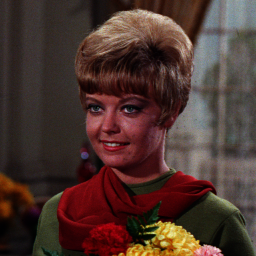

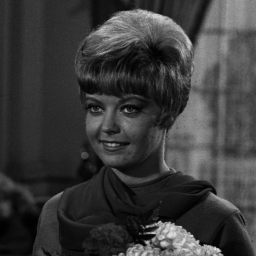

In [99]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

cv2_imshow(img)
cv2_imshow(img_gray)

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:

In [6]:
# Menentukan kernel yang akan digunakan
# Image sharpen
kernel_sharpen = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

In [ ]:
convolution2d(img_gray, kernel_sharpen, 1, 2)

a. Sharpen

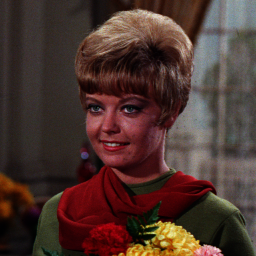

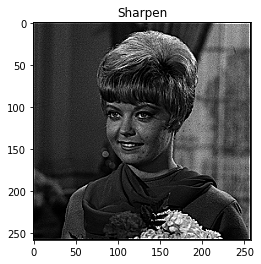

In [104]:
# Image Sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(img)

image_sharpen = img_gray.copy()
image_sharpen = convolution2d(img_gray, kernel_sharpen, 1, 2)

plt.title("Sharpen")
plt.imshow(image_sharpen, cmap='gray',vmin=0, vmax=255)

b. Emboss

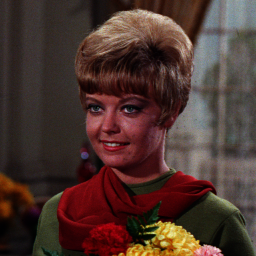

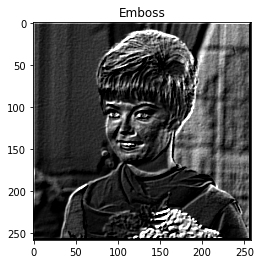

In [85]:
# Image Emboss
kernel_emboss = np.array([[-2, -1, 0],
                         [-1, 1, 1],
                         [0, 1, 2]])

cv2_imshow(img)

image_emboss = img_gray.copy()
image_emboss = convolution2d(img_gray, kernel_emboss, 1, 2)

plt.title("Emboss")
plt.imshow(image_emboss, cmap='gray',vmin=0, vmax=255)

c. Left Sobel Edge Detection

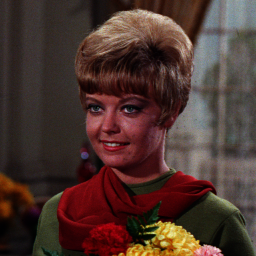

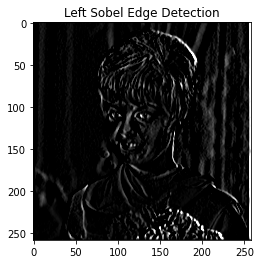

In [87]:
# Image Left Sobel Edge Detection
kernel_leftSobelEdgeDetection = np.array([[1, 0, -1],
                                          [2, 0, -2],
                                          [1, 0, -1]])

cv2_imshow(img)

image_leftSobelEdgeDetection = img_gray.copy()
image_leftSobelEdgeDetection = convolution2d(img_gray, kernel_leftSobelEdgeDetection, 1, 2)

plt.title("Left Sobel Edge Detection")
plt.imshow(image_leftSobelEdgeDetection, cmap='gray',vmin=0, vmax=255)

d. Canny Edge Detection

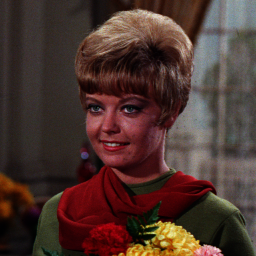

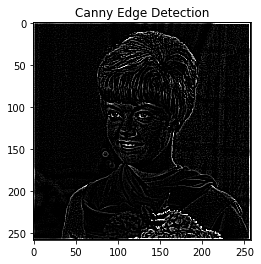

In [90]:
# Image Canny Edge Detection
kernel_cannyEdgeDetection = np.array([[-1, -1, -1],
                                      [-1, 8, -1],
                                      [-1, -1, -1]])

cv2_imshow(img)

image_cannyEdgeDetection = img_gray.copy()
image_cannyEdgeDetection = convolution2d(img_gray, kernel_cannyEdgeDetection, 1, 2)

plt.title("Canny Edge Detection")
plt.imshow(image_cannyEdgeDetection, cmap='gray',vmin=0, vmax=255)

e. Prewitt Edge Detection

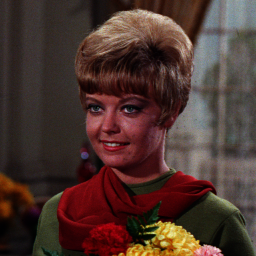

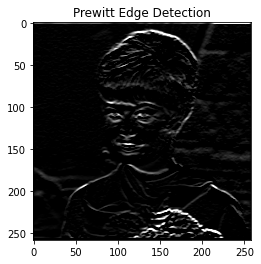

In [91]:
# Image Prewitt Edge Detection
kernel_prewittEdgeDetection = np.array([[-1, -1, -1],
                                        [0, 0, 0],
                                        [1, 1, 1]])

cv2_imshow(img)

image_prewittEdgeDetection = img_gray.copy()
image_prewittEdgeDetection = convolution2d(img_gray, kernel_prewittEdgeDetection, 1, 2)

plt.title("Prewitt Edge Detection")
plt.imshow(image_prewittEdgeDetection, cmap='gray',vmin=0, vmax=255)

f. 5x5 Gaussian Blur

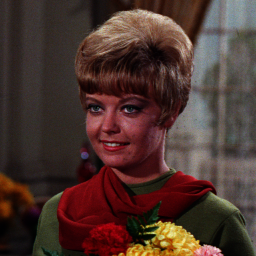

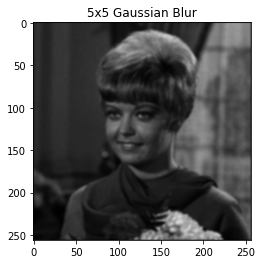

In [92]:
# Image 5x5 Gaussian Blur
kernel_gaussianBlur = np.array([[1, 4, 6, 4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1, 4, 6, 4, 1]]) * 1/256 

cv2_imshow(img)

image_gaussianBlur = img_gray.copy()
image_gaussianBlur = convolution2d(img_gray, kernel_gaussianBlur, 1, 2)

plt.title("5x5 Gaussian Blur")
plt.imshow(image_gaussianBlur, cmap='gray',vmin=0, vmax=255)

g. 21x21 Gaussian Blur

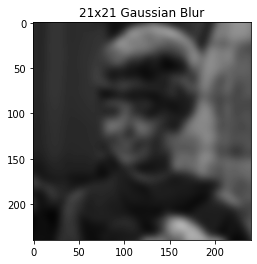

In [94]:
# Image 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(img)

image_gaussianBlur21 = img_gray.copy()
image_gaussianBlur21 = convolution2d(image_gaussianBlur21, gauss_kernel, 1, 2)

plt.title("21x21 Gaussian Blur")
plt.imshow(image_gaussianBlur21, cmap='gray',vmin=0, vmax=255)
